# Exploring the LA Crime Data

## Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Loading the Data

Below, we are creating a dataframe, where we load the cleaned data.

In [22]:
crime_data = pd.read_csv("LAcrime2012-2016.csv")

Looking at the column names of the crime_data dataframe.

In [23]:
print list(crime_data.columns)

['Unnamed: 0', 'year_id', 'date_rptd', 'dr_no', 'date_occ', 'time_occ', 'area', 'area_name', 'rd', 'crm_cd', 'crm_cd_desc', 'status', 'status_desc', 'location', 'cross_st', 'lat', 'long', 'year', 'month', 'day_of_month', 'hour_of_day', 'year_month', 'day_of_week', 'weekday', 'intersection', 'simple_bucket']



Dropping the "Unnamed: 0" column from the crime_data dataframe.

In [24]:
crime_data.drop(crime_data.columns[crime_data.columns.get_loc("Unnamed: 0")], axis=1, inplace=True)


Taking a quick look at the head of crime_data dataframe.

In [25]:
crime_data.head(3)

,year_id,date_rptd,dr_no,date_occ,time_occ,area,area_name,rd,crm_cd,crm_cd_desc,...,long,year,month,day_of_month,hour_of_day,year_month,day_of_week,weekday,intersection,simple_bucket
0,2012,2013-01-02,120101610,2012-12-31,240,1,Central,158,761,BRANDISH WEAPON,...,-118.2413,2012,12,31,2,2012-12,Monday,Weekday,0,WEAPON LAWS
1,2012,2012-12-31,120101612,2012-12-31,2250,1,Central,156,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,-118.2458,2012,12,31,22,2012-12,Monday,Weekday,1,VIOLENT
2,2012,2013-01-03,120101614,2012-12-31,1830,1,Central,191,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,-118.2726,2012,12,31,18,2012-12,Monday,Weekday,0,THREAT


## Histogram of Crimes by Crime Type

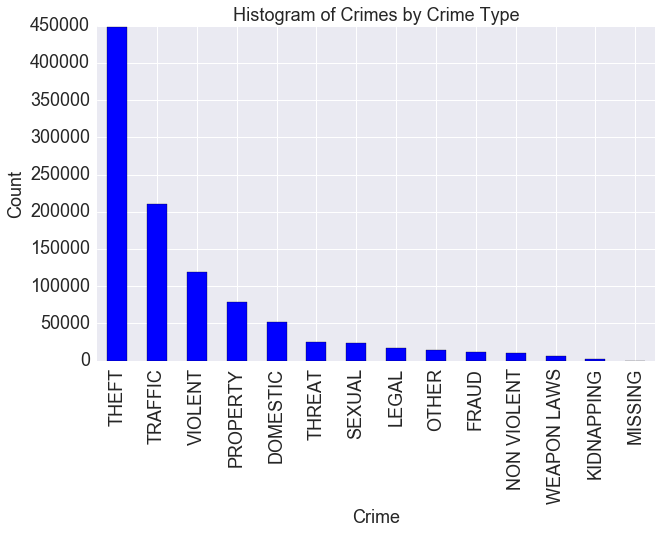

In [26]:
plt.figure(figsize=(10,6))
crime_data['simple_bucket'].value_counts().plot(kind='bar')
plt.tick_params(axis='x', labelsize=18)
plt.xticks(rotation='vertical')
plt.tick_params(axis='y', labelsize=18)
plt.title("Histogram of Crimes by Crime Type", fontsize=18)
plt.xlabel("Crime", fontsize=18)
plt.ylabel("Count", fontsize=18)

## Histogram of Crimes by Police Station

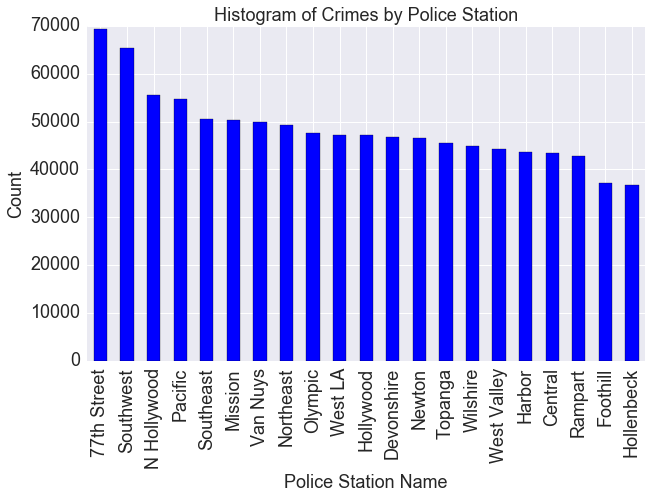

In [27]:
plt.figure(figsize=(10,6))
crime_data['area_name'].value_counts().plot(kind='bar')
plt.tick_params(axis='x', labelsize=18)
plt.xticks(rotation='vertical')
plt.tick_params(axis='y', labelsize=18)
plt.title("Histogram of Crimes by Police Station", fontsize=18)
plt.xlabel("Police Station Name", fontsize=18)
plt.ylabel("Count", fontsize=18)

## Histogram of Crimes by Police Station

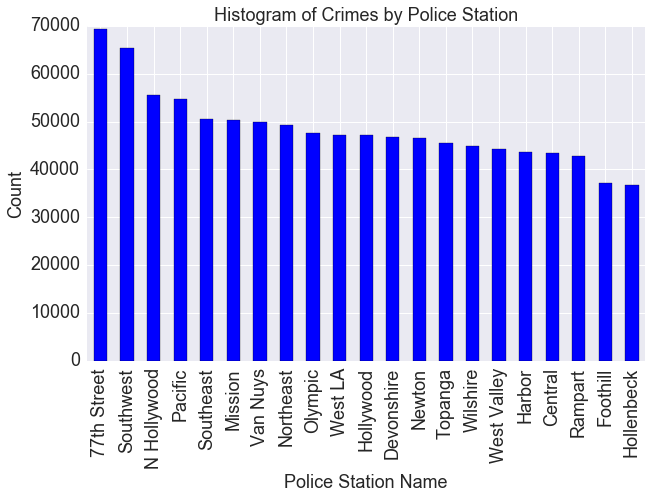

In [28]:
plt.figure(figsize=(10,6))
crime_data['area_name'].value_counts().plot(kind='bar')
plt.tick_params(axis='x', labelsize=18)
plt.xticks(rotation='vertical')
plt.tick_params(axis='y', labelsize=18)
plt.title("Histogram of Crimes by Police Station", fontsize=18)
plt.xlabel("Police Station Name", fontsize=18)
plt.ylabel("Count", fontsize=18)

## Re-defining the time_occ column

This column contains the the time the crime occured in a integer. Format lost when data downloaded from excel.

Creating a function that will take an integer as input. The integer will be converted to a string and extra 0s will the padded to the front to make the string 4 values. Then, we will extract the first 2 parts of the string, which will be the hour part. The last 2 parts of the string will convert minutes to fraction of an hour by dividing by 60.0

In [29]:
def convert_time_to_decimal_hours(x):
    
    x = str(x).zfill(4)
    
    time_hour = float(x[0:2])
    time_min = float( format( float(x[2:])/60.0 , ".2f") )
    
    time_out = time_hour + time_min
    
    return time_out

Applying this function to all the columns of the "TIME OCC" column.

In [30]:
crime_data["time_occ"] = crime_data["time_occ"].apply( convert_time_to_decimal_hours )

## Plotting crimes by crime type and time of day

Creating a list for the different crime types.

In [31]:
crime_types_lst = list(crime_data["simple_bucket"].value_counts().index)
print crime_types_lst
print "Total number of crimes: ", len(crime_types_lst)

['THEFT', 'TRAFFIC', 'VIOLENT', 'PROPERTY', 'DOMESTIC', 'THREAT', 'SEXUAL', 'LEGAL', 'OTHER', 'FRAUD', 'NON VIOLENT', 'WEAPON LAWS', 'KIDNAPPING', 'MISSING']
Total number of crimes:  14


Setting up the bin endges and bin mid points. Bin edges will be for each hour, 1 to 24, in steps of 1. The bin midpoints will be at the middle of each bin.

In [32]:
bin_edges_time = np.arange(0.0,24.0+1.0,1.0)
bin_mid_pts_time = ( (bin_edges_time[0]+bin_edges_time[1])/2.0 + bin_edges_time )[:-1]

Setting up a simple function to get the subplot number for each crime. It will allow for only 3 plots in each subplot.

In [33]:
def curr_sub_plot_num_crime_type(x):
    if x<3:
        sub_plot_num = 1
    elif x>=3 and x<6:
        sub_plot_num = 2
    elif x>=6 and x<9:
        sub_plot_num = 3
    elif x>=9 and x<12:
        sub_plot_num = 4    
    else:
        sub_plot_num = 5
    return sub_plot_num    

Creating figure for crime type for each hour.

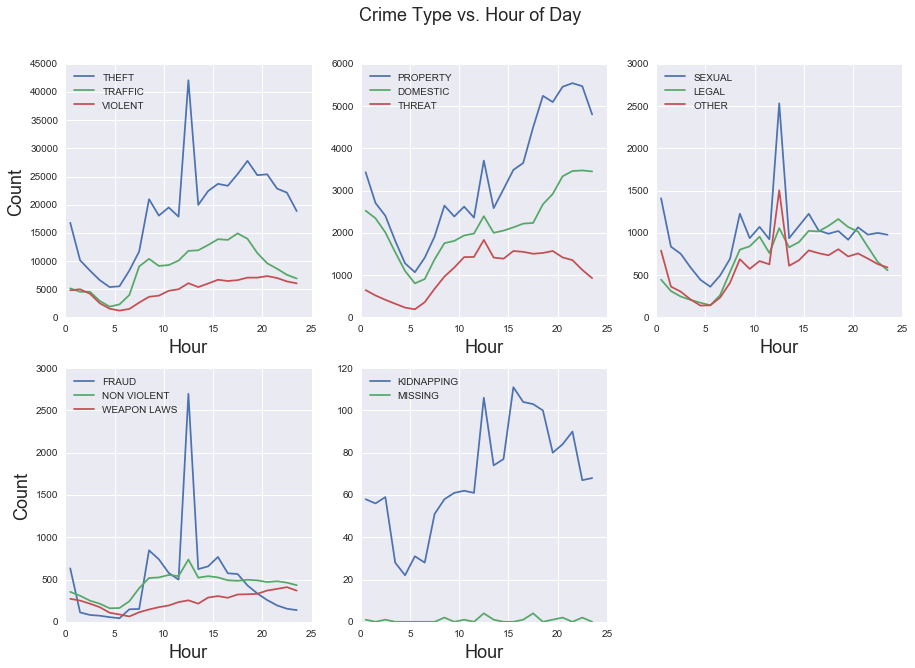

In [34]:
plt.figure(figsize=(15,10))
# Looping over all the crimes
for i, crime in enumerate(crime_types_lst):
    
    # Binning the data of each crime into a histogram
    y_vals = np.histogram(crime_data[ crime_data[ "simple_bucket" ] == crime ]["time_occ"].values, bins=bin_edges_time)[0]
    
    # Plotting each crime over time
    plt.subplot(2,3, curr_sub_plot_num_crime_type(i))
    plt.hold(True)
    plt.plot(bin_mid_pts_time, y_vals, label = crime_types_lst[i] )
    plt.xlabel("Hour", fontsize=18)
    
    # Only plotting the y-label for the left-most plots
    if curr_sub_plot_num_crime_type(i)==1 or curr_sub_plot_num_crime_type(i)==4:
        plt.ylabel("Count", fontsize=18)
    # Adding a legend    
    plt.legend(loc = "upper left")
    
# Plotting a title for the entire figure       
plt.hold(False)        
plt.suptitle("Crime Type vs. Hour of Day",  fontsize=18)        

# Saving the figure
plt.savefig("crime_type_vs_hour_of_day.png", bbox_inches="tight")



## Plotting crimes by crime type and month

Setting up the bin endges and bin mid points. Bin edges will be for each month, 1 to 12, in steps of 1. The bin midpoints will be at the middle of each bin.

In [35]:
bin_edges_month = np.arange(0.0,12.0+1.0,1.0)
bin_mid_pts_month = ( (bin_edges_month[0]+bin_edges_month[1])/2.0 + bin_edges_month )[:-1]

Creating figure for crime type for each month.

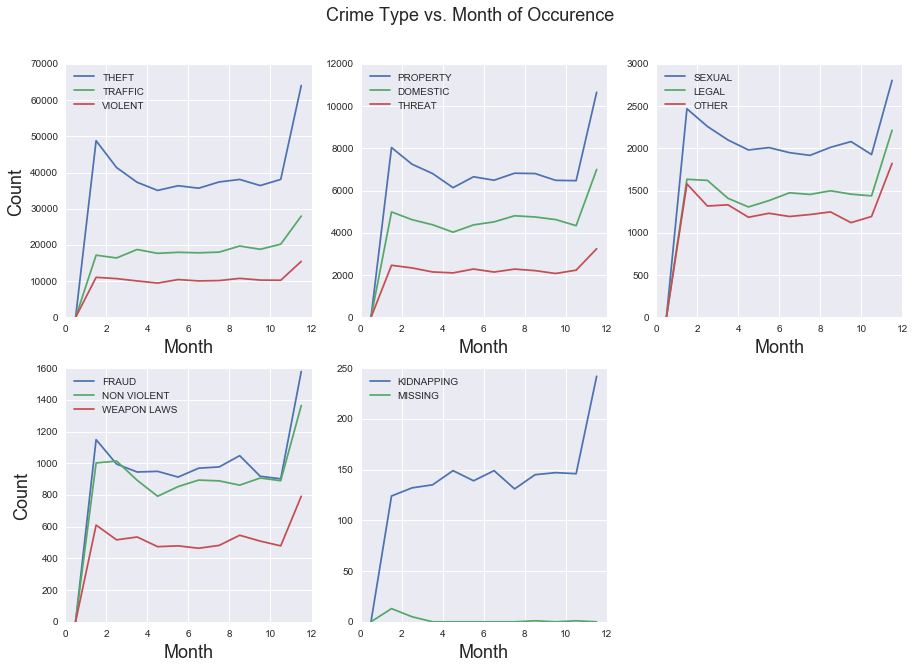

In [36]:
plt.figure(figsize=(15,10))
# Looping over all the crimes
for i, crime in enumerate(crime_types_lst):
    
    # Binning the data of each crime into a histogram
    y_vals = np.histogram(crime_data[ crime_data[ "simple_bucket" ] == crime ]["month"].values, bins=bin_edges_month)[0]
    
    # Plotting each crime over time
    plt.subplot(2,3,curr_sub_plot_num_crime_type(i))
    plt.hold(True)
    plt.plot(bin_mid_pts_month, y_vals, label = crime_types_lst[i] )
    plt.xlabel("Month", fontsize=18)
    
    # Only plotting the y-label for the left-most plots
    if curr_sub_plot_num_crime_type(i)==1 or curr_sub_plot_num_crime_type(i)==4:
        plt.ylabel("Count", fontsize=18)
    # Adding a legend    
    plt.legend(loc = "upper left")
    plt.xlim((0.0,12.0))
    
# Plotting a title for the entire figure       
plt.hold(False)        
plt.suptitle("Crime Type vs. Month of Occurence",  fontsize=18)        

# Saving the figure
plt.savefig("crime_type_vs_month.png", bbox_inches="tight")


## Plotting crimes by Police Station and time of day

In [37]:
pol_station_lst = list(crime_data["area_name"].value_counts().index)
print pol_station_lst
print "Total number of Police Stations: ", len(pol_station_lst)

['77th Street', 'Southwest', 'N Hollywood', 'Pacific', 'Southeast', 'Mission', 'Van Nuys', 'Northeast', 'Olympic', 'West LA', 'Hollywood', 'Devonshire', 'Newton', 'Topanga', 'Wilshire', 'West Valley', 'Harbor', 'Central', 'Rampart', 'Foothill', 'Hollenbeck']
Total number of Police Stations:  21


Setting up a simple function to get the subplot number for each police station. It will allow for only 3 or 4 plots in each subplot.

In [38]:
def curr_sub_plot_num_pol_station(x):
    if x<4:
        sub_plot_num = 1
    elif x>=4 and x<8:
        sub_plot_num = 2
    elif x>=8 and x<12:
        sub_plot_num = 3
    elif x>=12 and x<15:
        sub_plot_num = 4
    elif x>=15 and x<18:
        sub_plot_num = 5    
    else:
        sub_plot_num = 6
    return sub_plot_num    

Creating figure for crimes each hour for police station

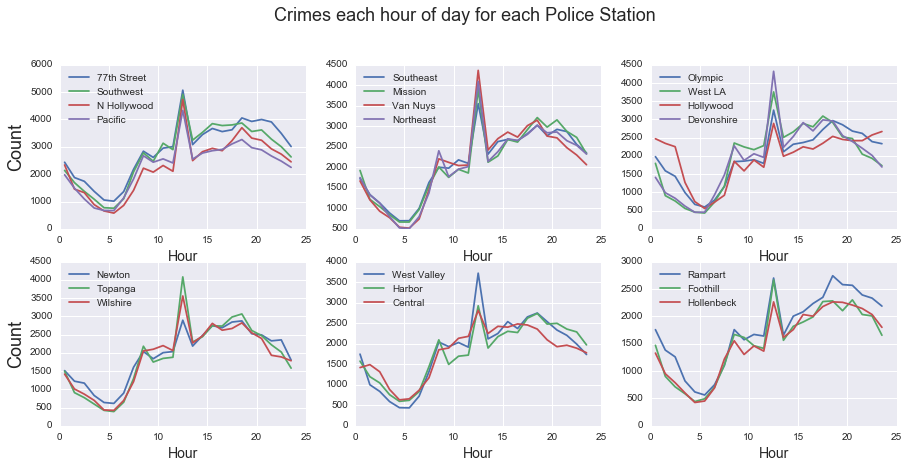

In [39]:
plt.figure(figsize=(15,10))
# Looping over all the police stations
for i, station in enumerate(pol_station_lst):
    
    # Binning the data of each station into a histogram
    y_vals = np.histogram(crime_data[ crime_data[ "area_name" ] == station ]["time_occ"].values, bins=bin_edges_time)[0]
    
    # Plotting each station data over time
    plt.subplot(3,3, curr_sub_plot_num_pol_station(i))
    plt.hold(True)
    plt.plot(bin_mid_pts_time, y_vals, label = pol_station_lst[i] )
    plt.xlabel("Hour", fontsize=14)
    
    # Only plotting the y-label for the left-most plots
    if curr_sub_plot_num_pol_station(i)==1 or curr_sub_plot_num_pol_station(i)==4:
        plt.ylabel("Count", fontsize=18)
    # Adding a legend    
    plt.legend(loc = "upper left")
    
# Plotting a title for the entire figure       
plt.hold(False)        
plt.suptitle("Crimes each hour of day for each Police Station",  fontsize=18)        

# Saving the figure
plt.savefig("police_station_vs_hour_of_day.png", bbox_inches="tight")

## Plotting crimes by Police Station and month

Creating figure for crimes each month for police station

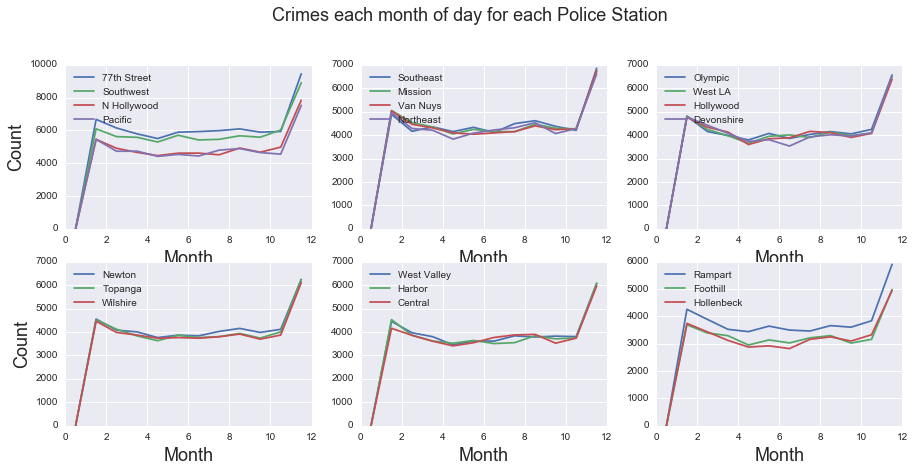

In [40]:
plt.figure(figsize=(15,10))
# Looping over all the crimes
for i, station in enumerate(pol_station_lst):
    
    # Binning the data of each crime into a histogram
    y_vals = np.histogram(crime_data[ crime_data[ "area_name" ] == station ]["month"].values, bins=bin_edges_month)[0]
    
    # Plotting each crime over time
    plt.subplot(3,3,curr_sub_plot_num_pol_station(i))
    plt.hold(True)
    plt.plot(bin_mid_pts_month, y_vals, label = pol_station_lst[i] )
    plt.xlabel("Month", fontsize=18)
    
    # Only plotting the y-label for the left-most plots
    if curr_sub_plot_num_pol_station(i)==1 or curr_sub_plot_num_pol_station(i)==4:
        plt.ylabel("Count", fontsize=18)
    # Adding a legend    
    plt.legend(loc = "upper left")
    plt.xlim((0.0,12.0))
    
# Plotting a title for the entire figure       
plt.hold(False)        
plt.suptitle("Crimes each month of day for each Police Station",  fontsize=18)         

# Saving the figure
plt.savefig("police_station_vs_month.png", bbox_inches="tight")